# Supervised ML



Supervised machine learning techniques involve training a model to operate on a set of features and predict a label using a dataset that includes some already-known label values. The training process fits the features to the known labels to define a general function that can be applied to new features for which the labels are unknown, and predict them. This corresponds to finding a suitable fuction f(x) to predict a given y in any x situation.

Lets work with data!!!!!!!!!!!!!!!!!!1

In [2]:
import os
import pathlib
import pandas as pd
from matplotlib import pyplot as plt
import urllib
from dotenv import load_dotenv


load_dotenv()

CSV_URL="https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv"

csv_path=pathlib.Path(os.environ["DATA_DIR"]) / "bikes.csv"

urllib.request.urlretrieve(CSV_URL, csv_path)

bike_data=pd.read_csv(csv_path, delimiter=",", header="infer")



bike_data


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In this dataset, rentals represents the label (the y value) we must train our model to predict. The other columns are potential features (x values).

In [3]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [4]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


Analyzing the RENTALS tag (y), we observe a big standard deviation (686) meaning a lot of variance for rentals per day. Lets plot it

C:\Users\Salis\AppData\Local\Temp\ipykernel_7044\1182655606.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


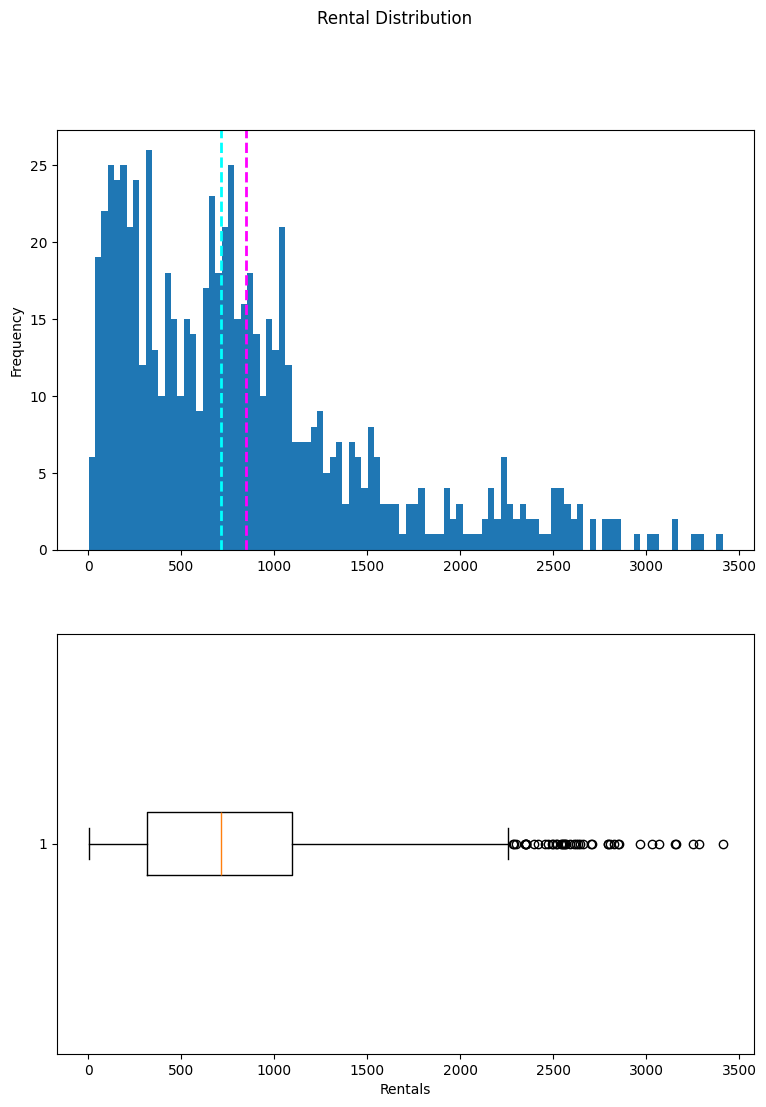

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

A histogram for each numeric value selected on the list

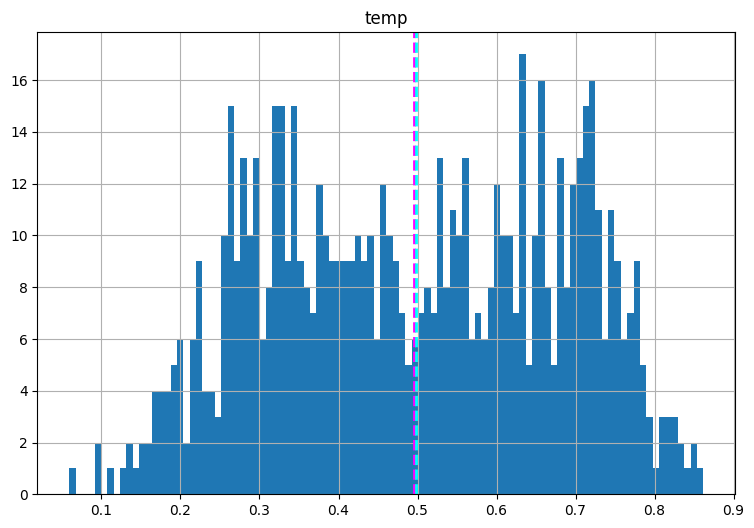

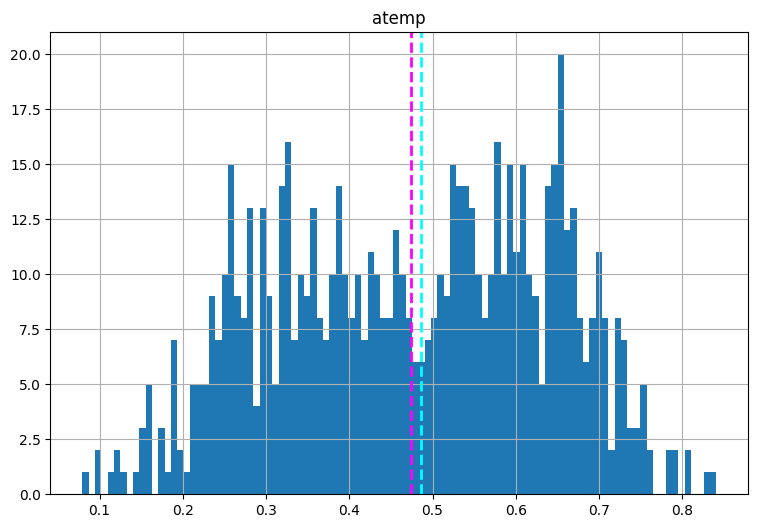

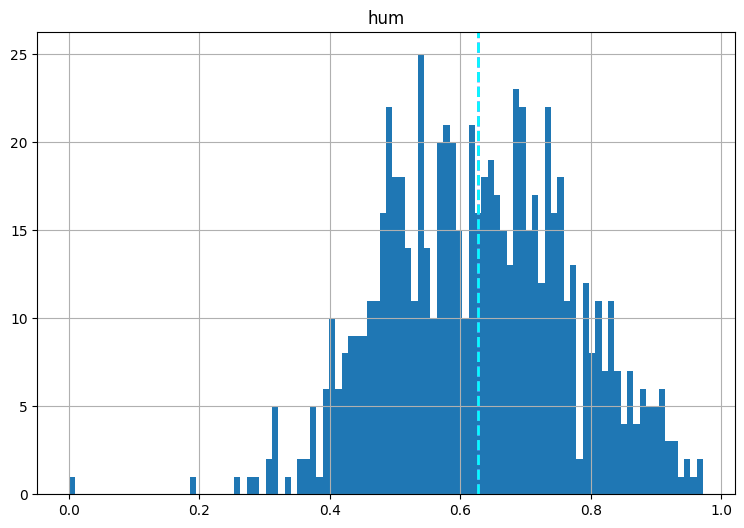

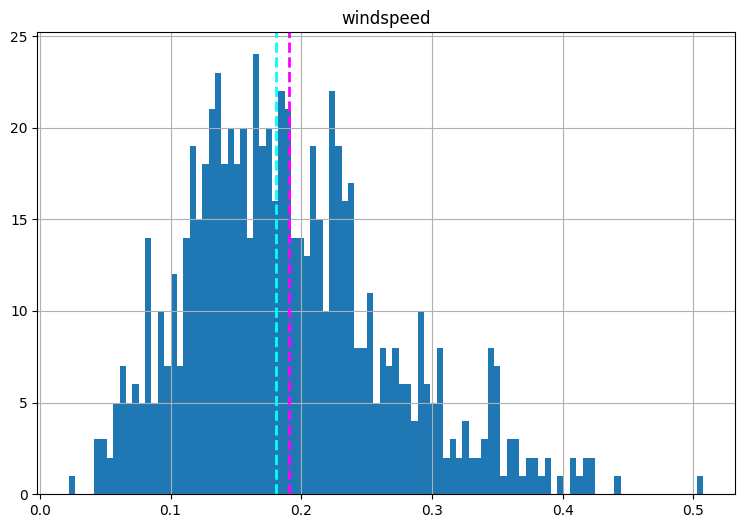

In [6]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Now, for the "categorical" values we'll use a bar plot to determine the frequency

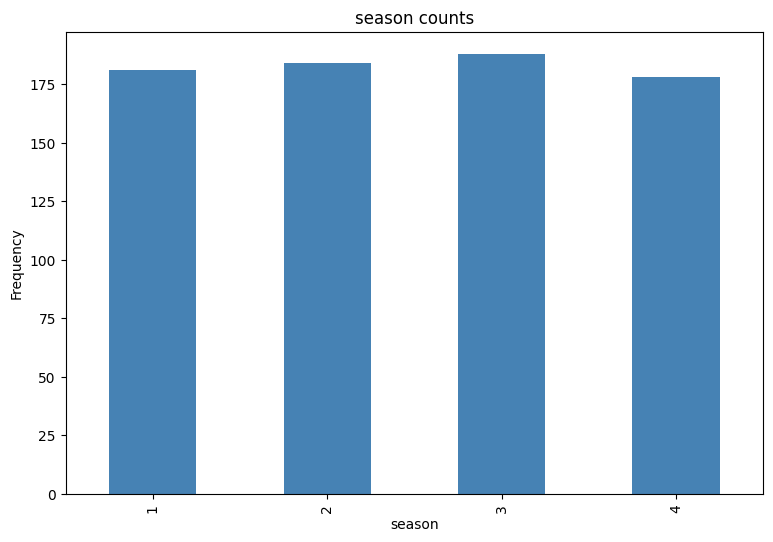

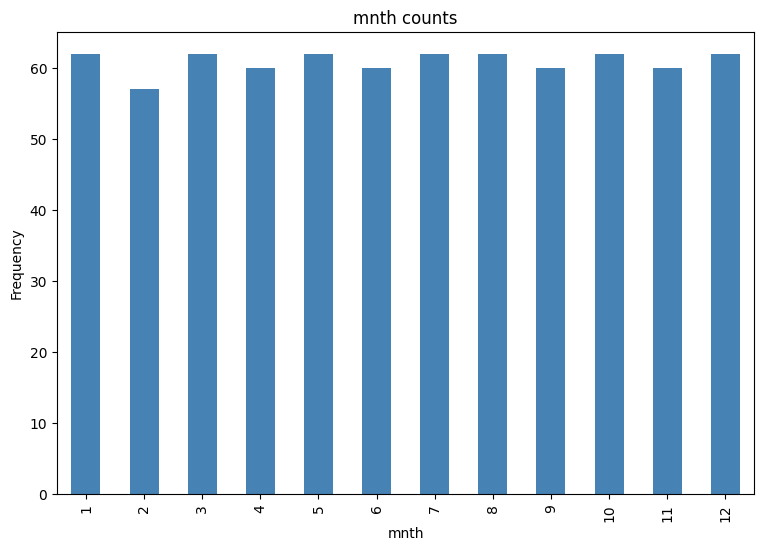

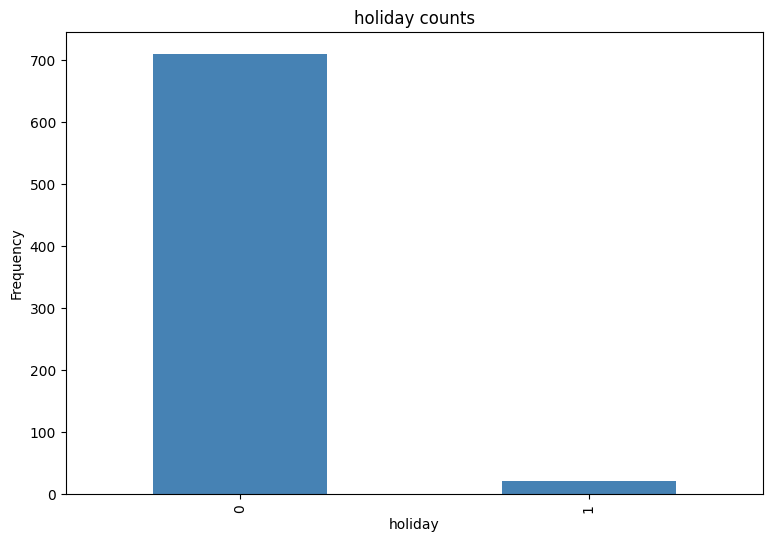

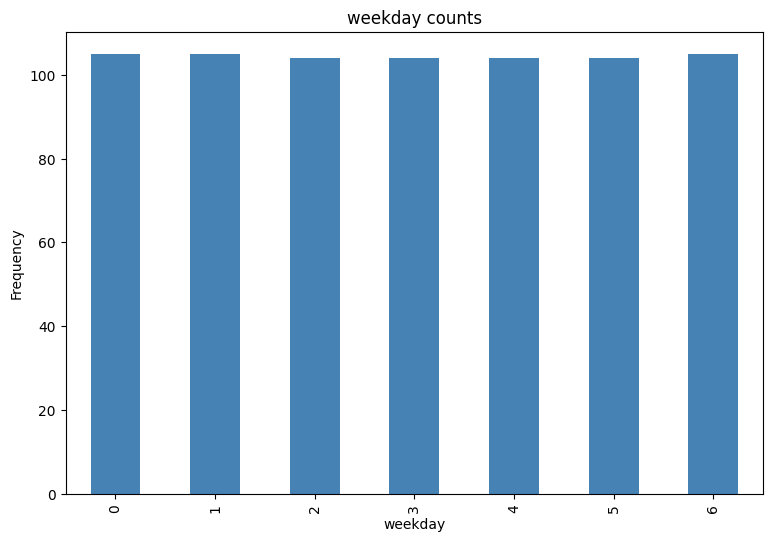

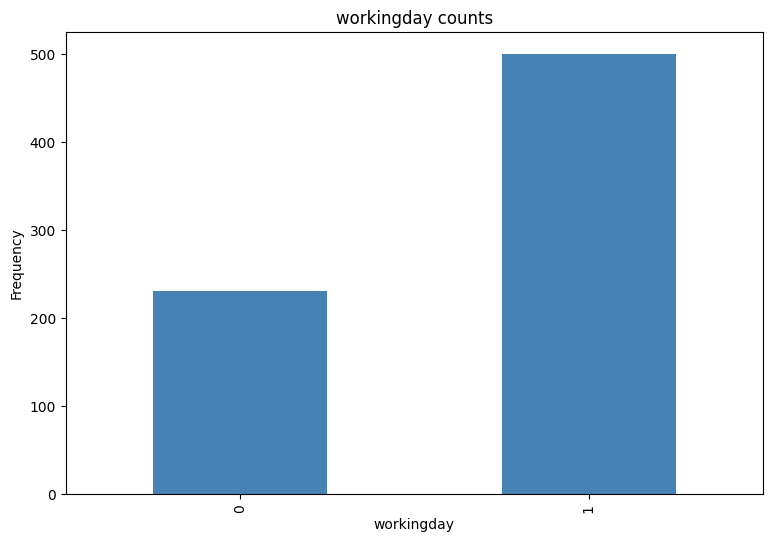

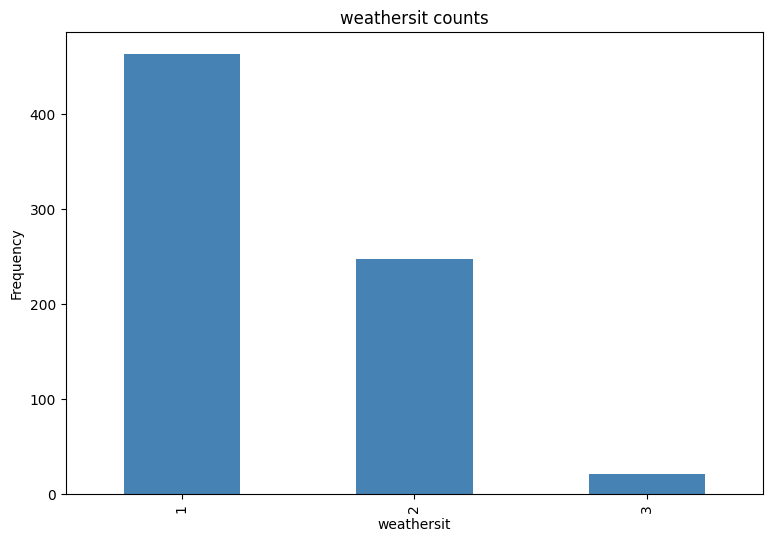

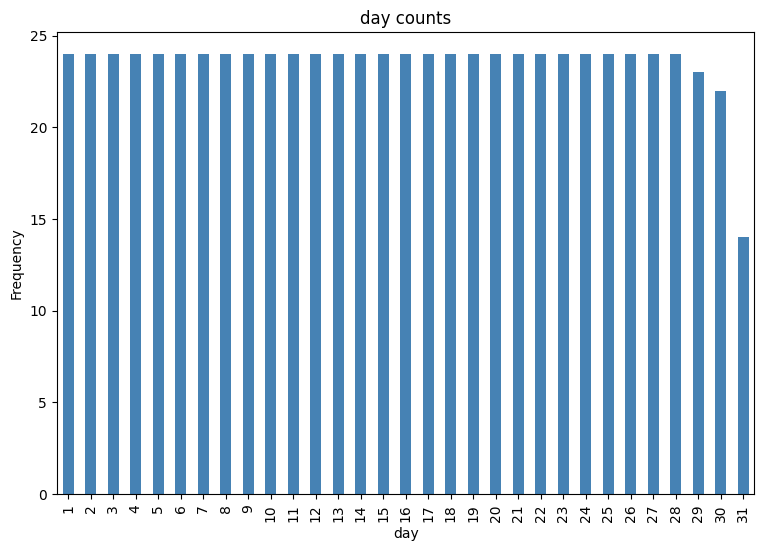

In [7]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

### Explaining the labels for the data

- instant: A unique row identifier
- dteday: The date on which the data was observed; in this case, the data was collected daily, so there's one row per date.
- season: A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)
- yr: The year of the study in which the observation was made (the study took place over two years: year 0 represents 2011, and year 1 represents 2012)
- mnth: The calendar month in which the observation was made (1:January ... 12:December)
- holiday: A binary value indicating whether or not the observation was made on a public holiday)
- weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- temp: The temperature in celsius (normalized)
- atemp: The apparent ("feels-like") temperature in celsius (normalized)
- hum: The humidity level (normalized)
- windspeed: The windspeed (normalized)
- rentals: The number of bicycle rentals recorded.

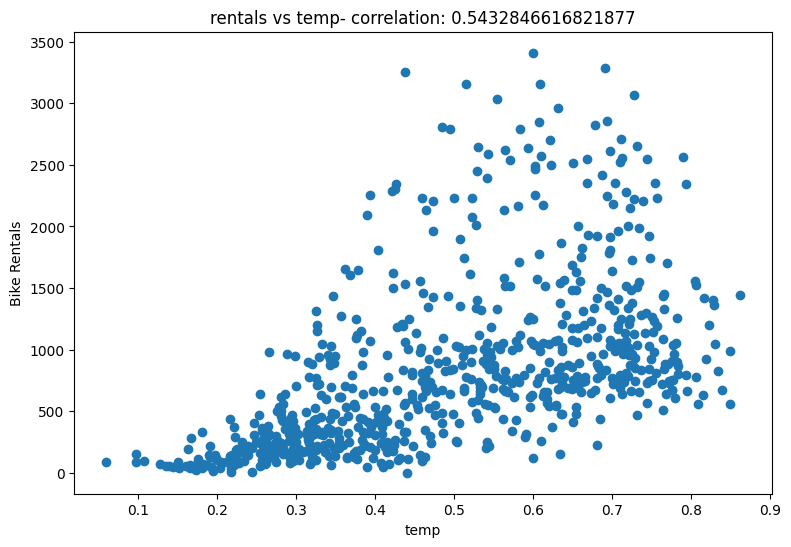

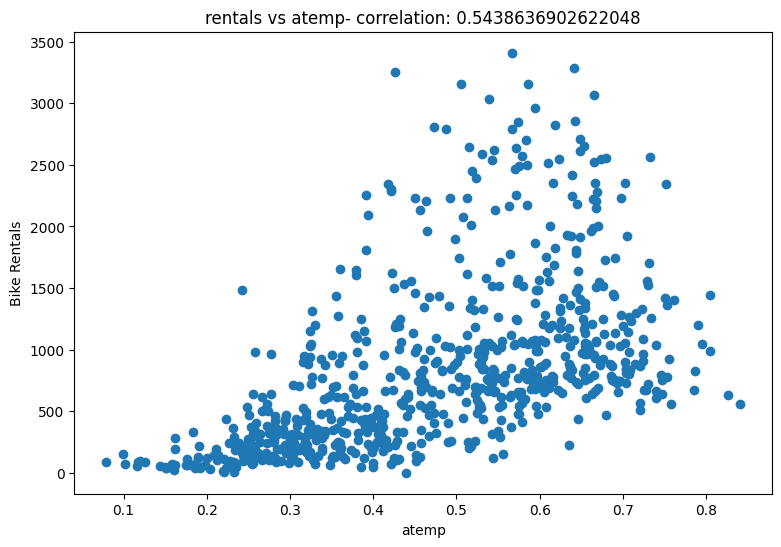

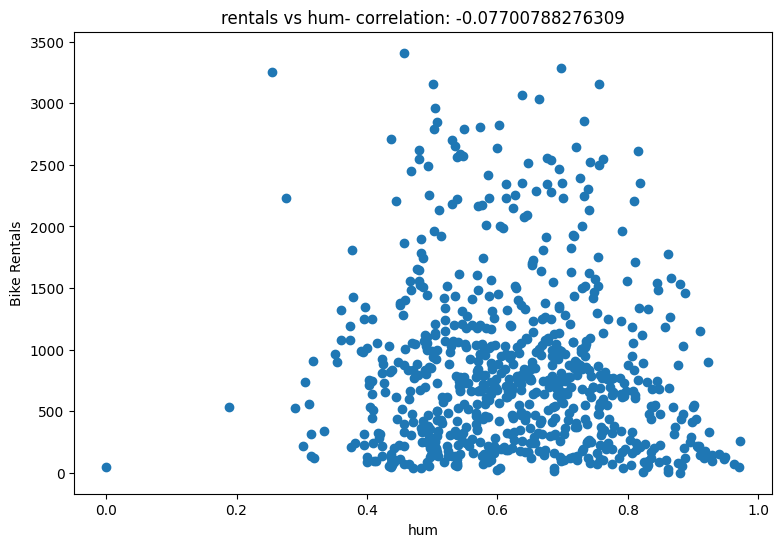

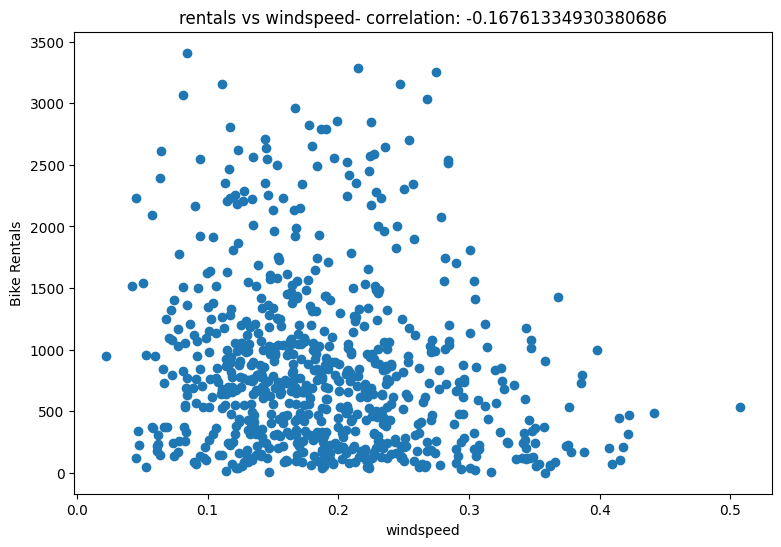

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

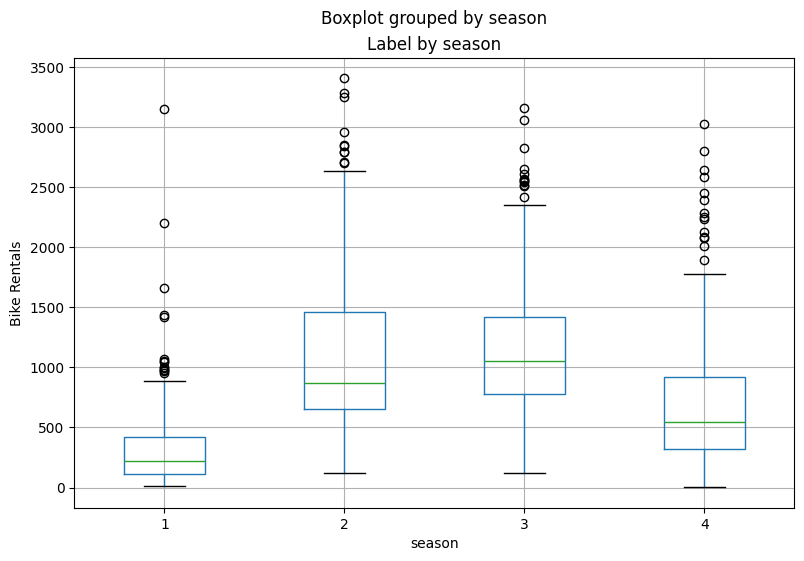

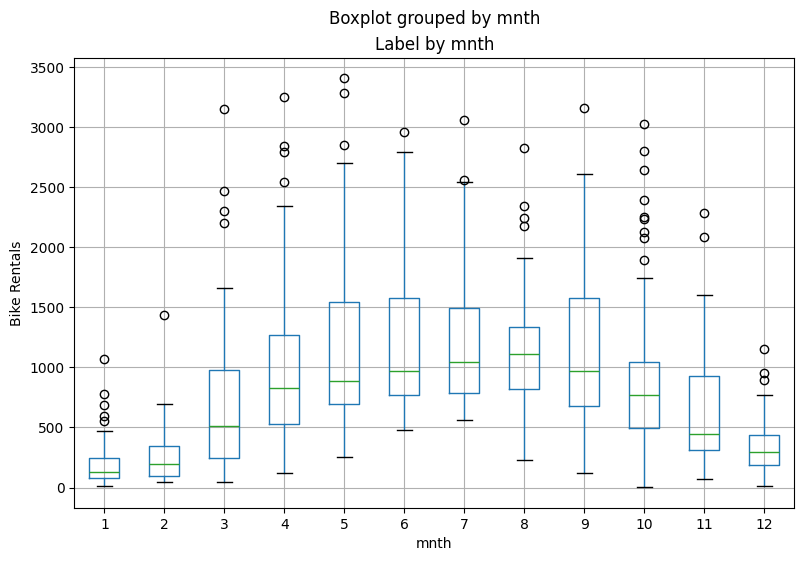

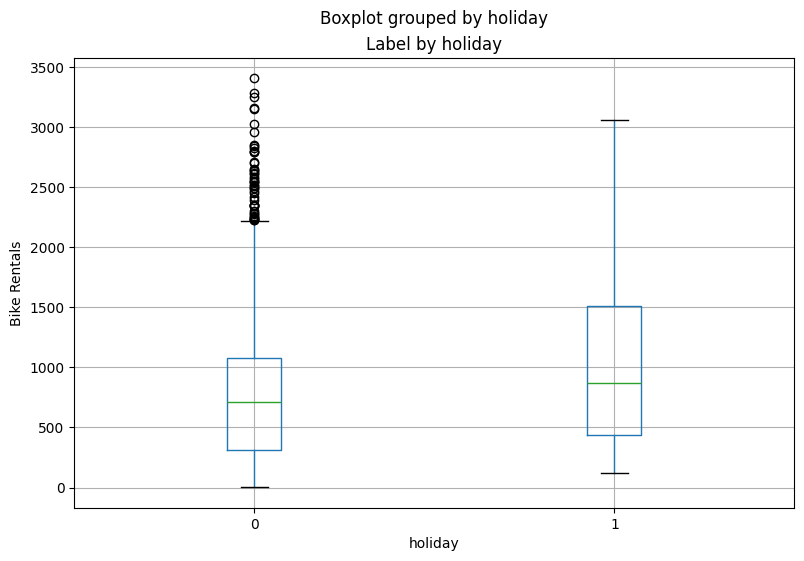

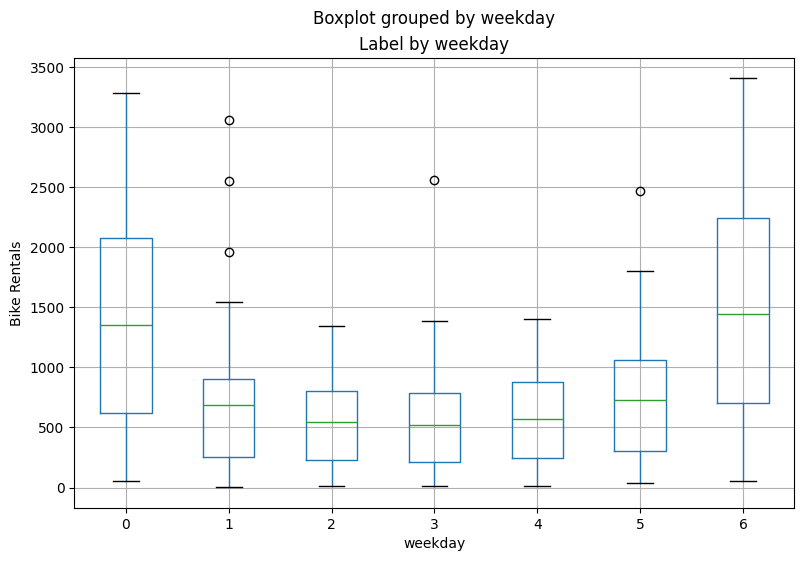

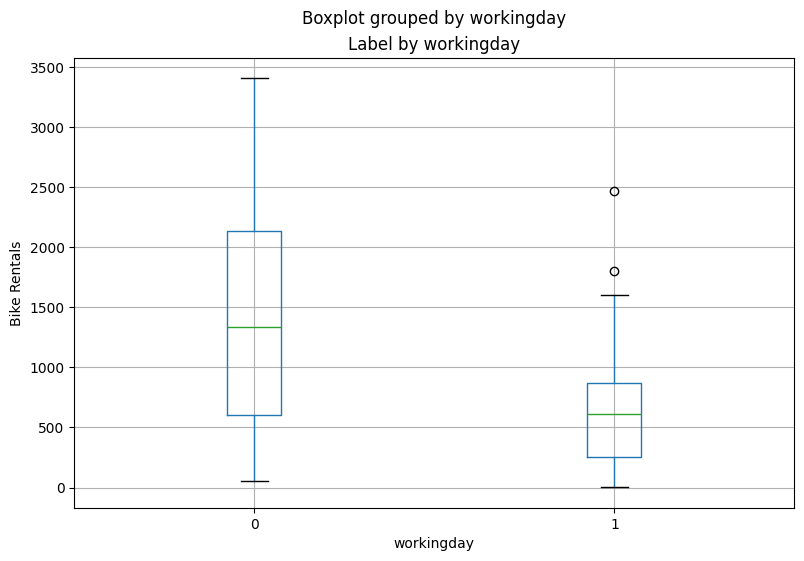

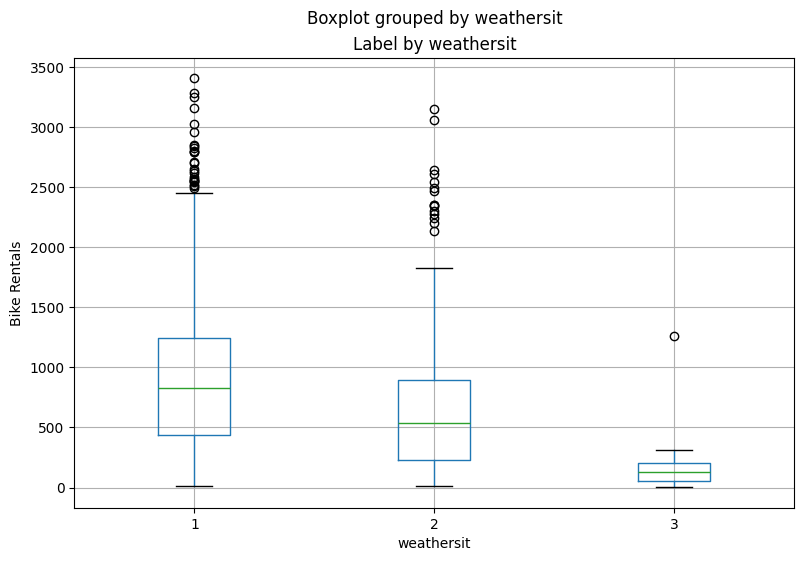

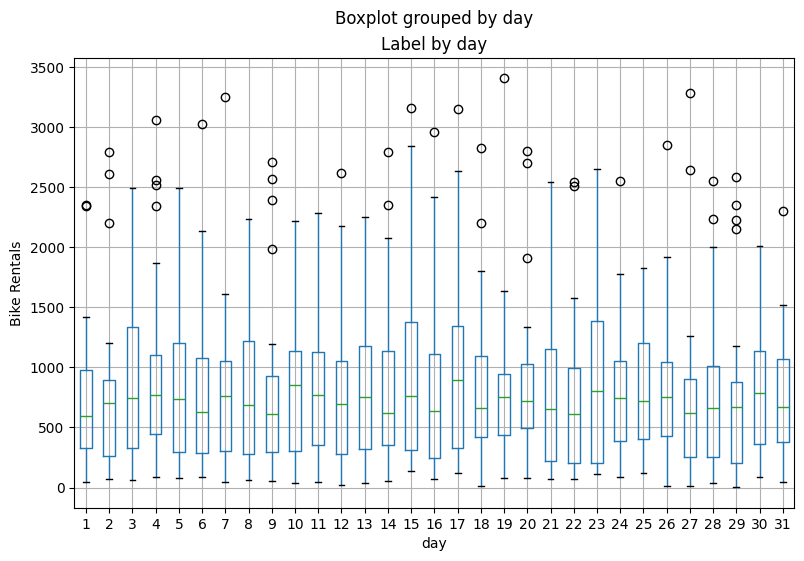

In [9]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

Train the model

In [10]:
#Define X and Y

X=bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values

y=bike_data["rentals"].values

print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

In [11]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [12]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [13]:
predictions=model.predict(X_test)

print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


We'll use plots to determine how well the dataset predicts

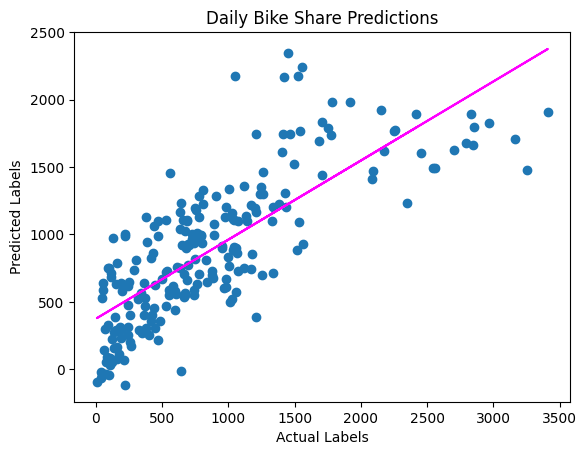

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The variance between the given value and the actual value is named residuals. For quantifying residuals we use

Mean Square Error (MSE):The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the model's fit.

Root Mean Square Error(RMSE):The square root of the MSE.

Coefficient of determination (R2):A relative metric in which the higher the value, the better the model's fit. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035615
RMSE: 449.4135728595167
R2: 0.6040454736919185


Now, we'll try another algorithms for predicting values

Lasso algorithm

In [16]:
from sklearn.linear_model import Lasso

model2= Lasso().fit(X_train, y_train)
predictions2=model2.predict(X_test)

mse2=mean_squared_error(y_test, predictions2)
rmse2=np.sqrt(mse2)
r2_2=r2_score(y_test, predictions2)

print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2:", r2_2)



MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


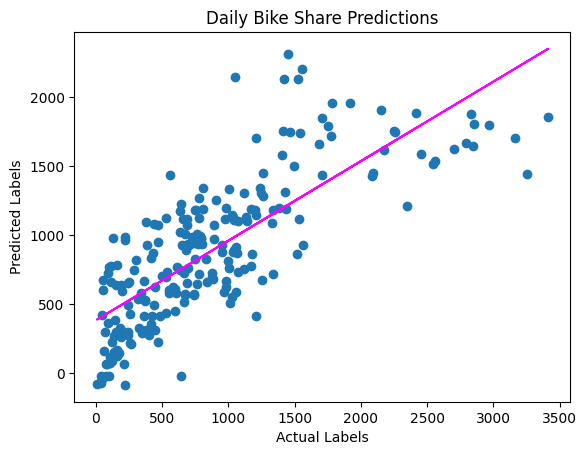

In [17]:
# Plot predicted vs actual
plt.scatter(y_test, predictions2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions2, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model3= DecisionTreeRegressor().fit(X_train, y_train)

tree=export_text(model3)

print(tree)


|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_7 <= 0.26
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_7 >  0.26
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_9 <= 0.36
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_9 >  0.36
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |

In [19]:
predictions3=model3.predict(X_test)

mse3=mean_squared_error(y_test,predictions3)
print(mse3)
rmse3=np.sqrt(mse3)
print(rmse3)
r2_3=r2_score(y_test, predictions3)
print(r2_3)

210696.70454545456
459.01710702919837
0.5869423348313123


Esemble Algorithm: random forest

RandomForestRegressor() 

MSE: 109050.31682045457
RMSE: 330.227674219552
R2: 0.7862136982686169


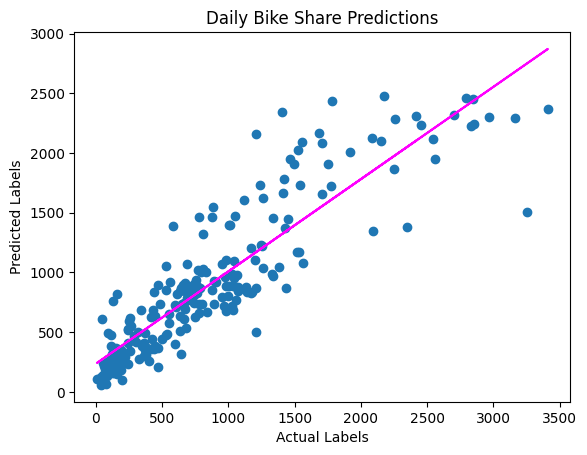

In [20]:

from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor().fit(X_train, y_train)
print (model4, "\n")

# Evaluate the model using the test data
predictions4 = model4.predict(X_test)
mse4 = mean_squared_error(y_test, predictions4)
print("MSE:", mse4)
rmse4 = np.sqrt(mse4)
print("RMSE:", rmse4)
r2_4 = r2_score(y_test, predictions4)
print("R2:", r2_4)

# Plot predicted vs actual
plt.scatter(y_test, predictions4)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions4, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

For good measure, let's also try a boosting ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees; but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor() 

MSE: 104235.82388034684
RMSE: 322.85573230213345
R2: 0.7956522095025835


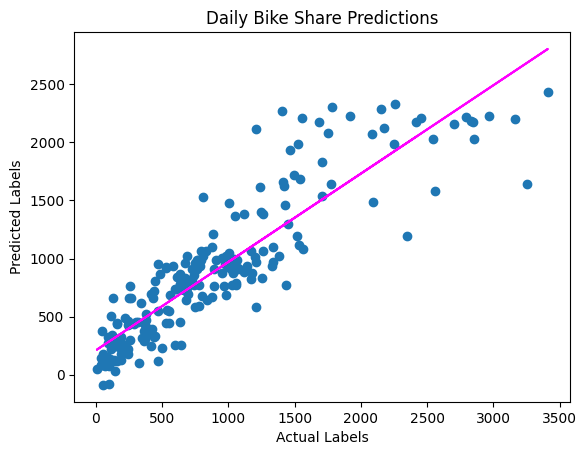

In [21]:

from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## HYPERPARAMETERS:

Affect the way an algorithm learns. Usually the default value works, but sometimes is good to modify them.

values that you specify to affect the behavior of a training algorithm are more correctly referred to as hyperparameters.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score


alg=GradientBoostingRegressor()

params={"learning_rate":[0.1, 0.5,1.0], "n_estimators": [50,100,150]}

score=make_scorer(r2_score)

gridsearch=GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)

print(f"Best params: {gridsearch.best_params_}")

Best params: {'learning_rate': 0.1, 'n_estimators': 100}


##PROCESSING THE DATA

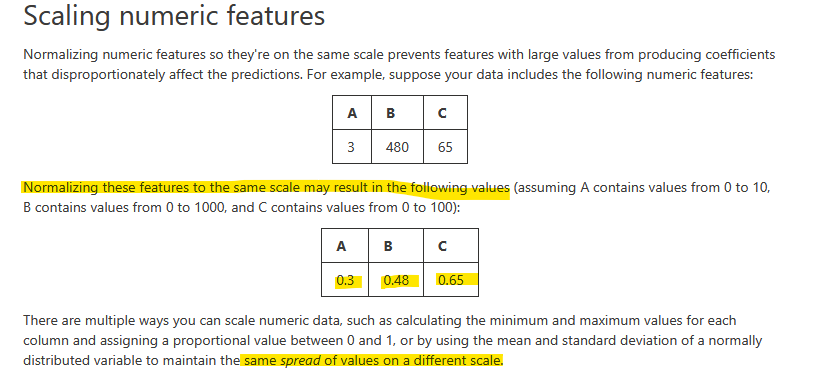

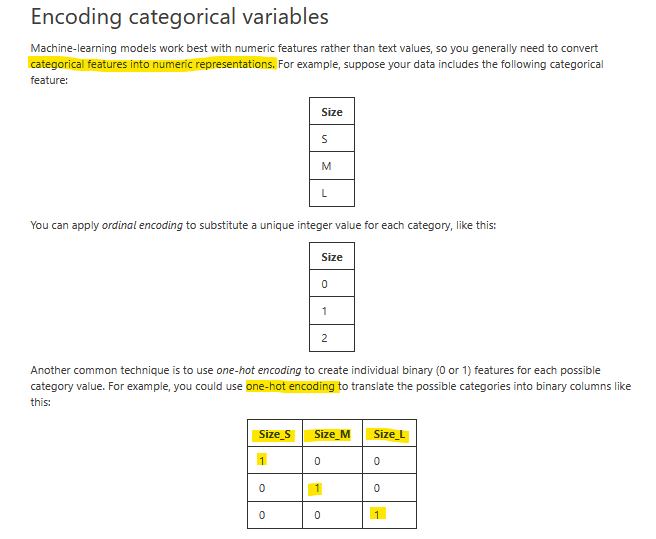

We'll apply the preprocessing transformations to the data of bike rental using Scikit-learn pipelines feature.


"These pipelines allow us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data)."

In [23]:
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,27
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,28
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,29
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,30


array([1488,   38, 1729,  954, 1242,  347,  408,  991,  563,  491,  135,
        639, 1047, 1651,  615,  316,  532,  625, 1658,  885,   87,  109,
        324,  799,  834,  251,  206, 1935, 2622,  148,  254,  982,  968,
        838,  173, 1008,  642,  373, 1100,  199,  307,  163,   92,  305,
       1298,  955,  667,  568,  665, 1743, 1192,  227,  888, 1198,  692,
        833,  746,  732,  349, 1433,  750,  571,  788, 1275, 1379,  179,
        217,  848,  331,  218,  774, 1233,  275,  669,  902,  516, 1051,
       1052,  209,  409,  801,  475,   94, 2521,  935, 1077,  894,  253,
       2224,   67, 1128, 1504,   15,  964,  880,  560,  108, 1582,  233,
        784, 1348, 1619, 2643,  318,  968,  753, 1338, 1081,  998, 2135,
       2496,  198, 2230,  195,   89,  429, 1462,  956, 1516,   75,  244,
        404, 1612, 1434,  337,  751,  126,  867,  536,  482,   68,  261,
        466,  952,  630, 1031,  216,  710,  898,  100,   42,  190, 2252,
        855, 2229, 1325, 1603,  768,  424,  231,  6

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np


#Define preprocessing for numeric columns (scale them)
numeric_features=[6,7,8,9]
numeric_transformer= Pipeline(steps=[("scaler", StandardScaler())])

#for cat values
categorical_features=[0,1,2,3,4,5]
categorical_transformer=Pipeline(steps=[("onehot",OneHotEncoder(handle_unknown="ignore") )]) 

preprocessor= ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),("cat", categorical_transformer, categorical_features)])

pipeline=Pipeline(steps=[("preprocessor", preprocessor), ("regressor", GradientBoostingRegressor())])

model5=pipeline.fit(X_train, y_train)

print(model5)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


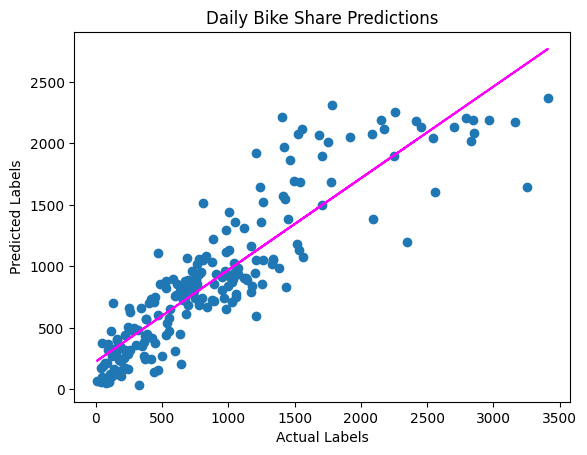

MSE: 105358.5000717845
RMSE: 324.58974116842404
R2: 0.7934512732925173


In [30]:
# Get predictions
predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual


Now that the pipeline is created, we just need to change the algorithm to test

In [27]:
pipeline2=Pipeline(steps=[("preprocessor", preprocessor), ("regressor", RandomForestRegressor())])

now we fit the new model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 



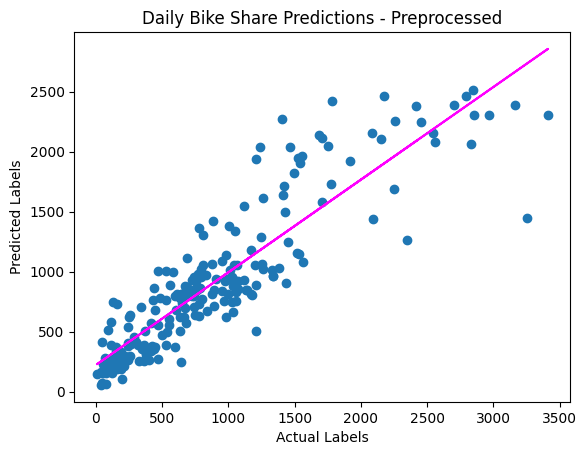

MSE: 103578.7701831818
RMSE: 321.83655818315884
R2: 0.7969403220367921


In [31]:
model = pipeline2.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual


Save and Use

In [32]:
import joblib


filename="./bike-share.pkl"
joblib.dump(model, filename)

['./bike-share.pkl']

Use

In [34]:
loaded_model= joblib.load(filename)
X_new=np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')

result=loaded_model.predict(X_new)

print(f"predicted rentals based on new data: {result}")

predicted rentals based on new data: [104.63]


We can use an array for multiple days!!

In [35]:
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(prediction)

5-day rental predictions:
576.66
777.31
254.29
225.83
292.52


In [40]:
h=[1,2,3]

print([h*3])

[[1, 2, 3, 1, 2, 3, 1, 2, 3]]
